# Find Placement is done or not using Machine Learning

## Steps:
- Preprocess + EDA + Feature Selection
- Extract input and output cols
- Scale the values
- Train test split
- Train the model
- Evaluate the model/model selection
- Deploy the model

In [65]:
import numpy as np
import pandas as pd

In [66]:
df = pd.read_csv("/content/placement.csv")

In [67]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [68]:
df.shape

(100, 4)

## preprocessing

In [69]:
# check null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [70]:
# remove Unnamed column
df = df.iloc[:, 1 : ]

In [71]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


## EDA

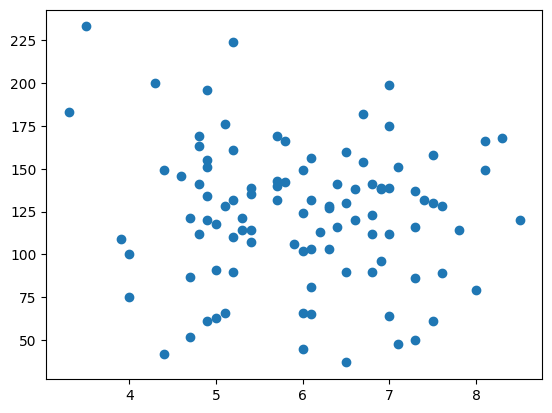

In [72]:
import matplotlib.pyplot as plt

plt.scatter(df['cgpa'], df['iq'])

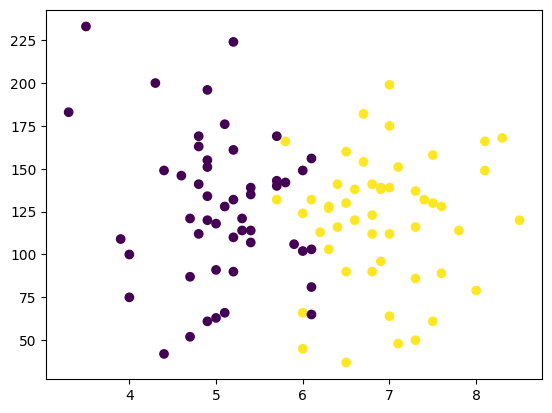

In [73]:
# check which student get placed
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

- yellow color means --> student get placed
- Blue color means --> student not placed

## Extract input and output cols

In [74]:
X = df.iloc[:, 0:2]  # cgpa, iq
y = df.iloc[:, -1]   # placement

In [75]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [76]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [77]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


## Train test split

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)


# test_size = 10%
# train size = 90%

In [79]:
X_train

,cgpa,iq
81,5.4,107.0
62,6.0,102.0
59,4.8,112.0
43,6.8,141.0
88,4.4,149.0
...,...,...
18,4.0,100.0
83,7.5,130.0
26,7.0,199.0
34,4.8,163.0


In [80]:
X_test

,cgpa,iq
27,6.0,124.0
67,5.0,118.0
7,5.0,63.0
25,5.0,91.0
12,5.4,139.0
11,6.9,138.0
65,8.1,166.0
80,4.9,196.0
61,7.3,137.0
79,6.5,90.0


In [81]:
y_train

,placement
81,0
62,0
59,0
43,1
88,0
...,...
18,0
83,1
26,1
34,0


In [82]:
y_test

,placement
27,1
67,0
7,0
25,0
12,0
11,1
65,1
80,0
61,1
79,1


## Scale the values

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [84]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.51484465, -0.4066712 ],
       [ 0.00971405, -0.53150207],
       [-1.03940335, -0.28184034],
       [ 0.70912565,  0.44217865],
       [-1.38910916,  0.64190803],
       [ 0.35941985,  0.44217865],
       [ 1.32111081, -1.55511512],
       [-0.16513885,  1.06633295],
       [ 0.88397855, -1.48021661],
       [ 1.23368436,  0.2174831 ],
       [ 0.971405  , -1.87967536],
       [-1.47653561,  1.91518281],
       [-0.68969755,  0.2174831 ],
       [-0.777124  , -1.43028426],
       [-0.16513885,  0.46714482],
       [ 0.88397855, -0.28184034],
       [-1.82624141, -0.35673886],
       [ 0.4468463 ,  0.91653592],
       [ 0.0971405 , -0.50653589],
       [ 0.70912565, -0.28184034],
       [ 0.53427275,  0.36728013],
       [-1.38910916, -2.0294724 ],
       [ 0.35941985, -0.18197565],
       [-2.17594721,  2.73906649],
       [-0.2525653 ,  0.41721248],
       [-0.6022711 , -0.05714479],
       [ 1.14625791, -0.93096082],
       [-0.9519769 ,  0.79170506],
       [-0.51484465,

In [85]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.00971405,  0.01775372],
       [-0.86455045, -0.13204331],
       [-0.86455045, -1.50518278],
       [-0.86455045, -0.80612996],
       [-0.51484465,  0.39224631],
       [ 0.7965521 ,  0.36728013],
       [ 1.84566951,  1.06633295],
       [-0.9519769 ,  1.81531812],
       [ 1.14625791,  0.34231396],
       [ 0.4468463 , -0.83109613]])

## Train the model

In [86]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [87]:
# model training
clf.fit(X_train, y_train)

LogisticRegression()

## Evaluate the model/model selection

get the accuracy_score

In [88]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1])

In [89]:
y_test

,placement
27,1
67,0
7,0
25,0
12,0
11,1
65,1
80,0
61,1
79,1


In [90]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

### What pattern notice the machine learning model to check using decision boundry

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

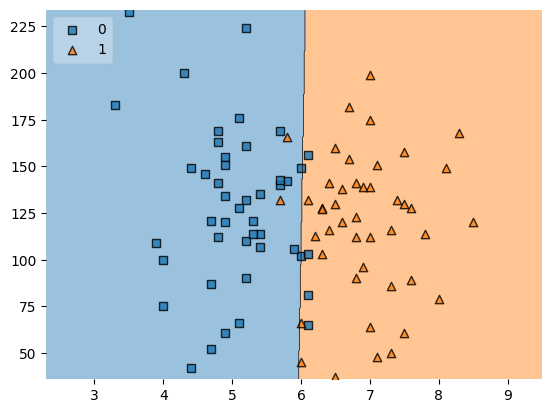

In [92]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train.values, y_train.values, clf=clf, legend=2)

In [93]:
import pickle

The pickle module in Python is used for serializing and de-serializing Python object structures. In simple terms, it converts a Python object (like your trained clf Logistic Regression model) into a byte stream, which can then be saved to a file or transferred over a network. This process is called pickling (or serialization).

Its primary use case, as demonstrated in the notebook, is to persist Python objects. Once you have a trained machine learning model, you can pickle it and save it to a file (model.pkl in your case). Later, you can load this pickled file back into a Python program, and the model will be reconstructed exactly as it was when it was saved, without needing to retrain it. This is incredibly useful for deploying models or saving progress.



In [94]:
pickle.dump(clf, open('model.pkl', 'wb'))
